In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurações do  pandas para mostrar mais linhas/colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [4]:
# Conectar ao banco de dados PostgreSQL
from sys import path
path.append('../')  # Adiciona pasta pai ao path
from src.db_config import get_engine

engine = get_engine()

print("Conexão com PostgreSQL estabelecida!")
print(f"Banco: ecoconsult_db")

Conexão com PostgreSQL estabelecida!
Banco: ecoconsult_db


In [5]:
# Carregar todas as tabelas do banco para DataFrames

print("Carregando dados do PostgreSQL...\n")

# Carregar cada tabela
clientes = pd.read_sql("SELECT * FROM clientes", engine)
print(f"Clientes: {len(clientes)} registros")

consultores = pd.read_sql("SELECT * FROM consultores", engine)
print(f"Consultores: {len(consultores)} registros")

produtos = pd.read_sql("SELECT * FROM produtos_sustentaveis", engine)
print(f"Produtos: {len(produtos)} registros")

vendas_servicos = pd.read_sql("SELECT * FROM vendas_servicos", engine)
print(f"Vendas de Serviços: {len(vendas_servicos)} registros")

vendas_produtos = pd.read_sql("SELECT * FROM vendas_produtos", engine)
print(f"Vendas de Produtos: {len(vendas_produtos)} registros")

print("\n" + "="*50)
print("Total de registros:", 
      len(clientes) + len(consultores) + len(produtos) + 
      len(vendas_servicos) + len(vendas_produtos))

Carregando dados do PostgreSQL...

Clientes: 100 registros
Consultores: 30 registros
Produtos: 50 registros
Vendas de Serviços: 200 registros
Vendas de Produtos: 150 registros

Total de registros: 530


In [10]:
# Estrutura das tabelas

print("="*60)
print("Análise da Tabela: Clientes")
print("="*60)

print("\n Primeiras 5 linhas:")
display(clientes.head())

print("\n Informações Gerais:")
clientes.info()

print("\n Estatísticas descritivas:")
display(clientes.describe())

print("\n VALORES FALTANTES:")
missing = clientes.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("Nenhum valor faltante!")

Análise da Tabela: Clientes

 Primeiras 5 linhas:


,id_cliente,razao_social,cnpj,setor_industria,porte_empresa,cidade,estado,data_cadastro,status,score_sustentabilidade_atual,meta_reducao_carbono
0,1,Alves e Filhos,43.815.092/0001-70,Varejo,Pequeno,Andrade do Sul,AP,2024-04-15,ativo,55,19.80
1,2,Novais S.A.,86.374.209/0001-30,Manufatura,Grande,Fernandes Paulista,BA,2024-04-13,pendente,33,37.07
2,3,Caldeira,16.928.450/0001-89,Educação,Pequeno,Nascimento de Campos,MG,2024-01-04,inativo,74,11.27
3,4,Pires,95.380.617/0001-96,Varejo,Pequeno,da Conceição,AM,2024-08-11,ativo,49,30.21
4,5,Porto,52.981.604/0001-60,Tecnologia,Grande,Nascimento,SC,2024-05-04,ativo,45,38.64



 Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    100 non-null    int64  
 1   razao_social                  100 non-null    object 
 2   cnpj                          100 non-null    object 
 3   setor_industria               100 non-null    object 
 4   porte_empresa                 100 non-null    object 
 5   cidade                        100 non-null    object 
 6   estado                        100 non-null    object 
 7   data_cadastro                 100 non-null    object 
 8   status                        100 non-null    object 
 9   score_sustentabilidade_atual  100 non-null    int64  
 10  meta_reducao_carbono          100 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB

 Estatísticas descritivas:


,id_cliente,score_sustentabilidade_atual,meta_reducao_carbono
count,100.00,100.00,100.00
mean,50.50,49.92,30.44
std,29.01,18.40,12.34
min,1.00,20.00,10.13
25%,25.75,34.00,19.29
50%,50.50,49.00,30.84
75%,75.25,63.00,42.22
max,100.00,85.00,49.05



 VALORES FALTANTES:
✅ Nenhum valor faltante!


📊 VISUALIZAÇÕES - CLIENTES


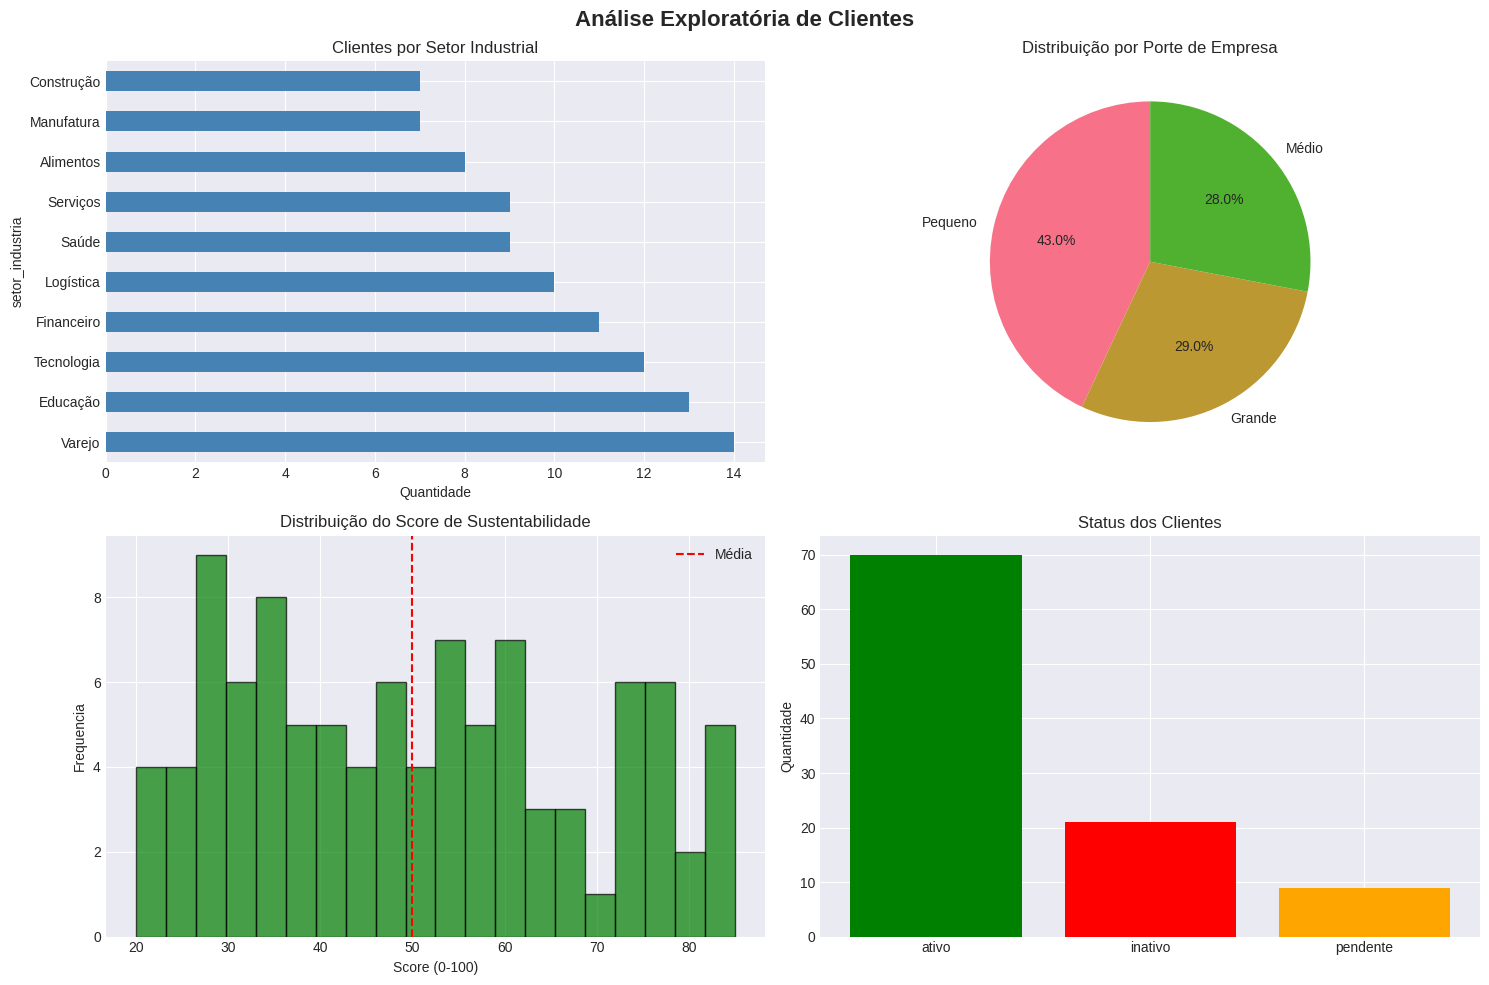


 Score médio de sustentabilidade: 49.92

 Meta média de redução de carbono: 30.44%


In [20]:
# Visualizações da tabela de clientes

print("="*60)
print("📊 VISUALIZAÇÕES - CLIENTES")
print("="*60)

#Criar Figures

fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Análise Exploratória de Clientes', fontsize=16, fontweight='bold')

# distribuindo por Setor
clientes['setor_industria'].value_counts().plot(
    kind='barh',
    ax=axes[0,0],
    color='steelblue'
    )
axes[0,0].set_title('Clientes por Setor Industrial')
axes[0,0].set_xlabel('Quantidade')


# Distribuindo por porte
clientes['porte_empresa'].value_counts().plot(
    kind='pie',
    ax=axes[0,1],
    autopct='%1.1f%%',
    startangle=90
)
axes[0,1].set_title('Distribuição por Porte de Empresa')
axes[0,1].set_ylabel('')

# Score de Sustentabilidade
axes[1, 0].hist(clientes['score_sustentabilidade_atual'], bins=20,
               color='green', alpha=0.7, edgecolor='black')
axes[1 ,0].set_title('Distribuição do Score de Sustentabilidade')
axes[1, 0].set_xlabel('Score (0-100)')
axes[1, 0].set_ylabel('Frequencia')
axes[1, 0].axvline(clientes['score_sustentabilidade_atual'].mean(),
                   color='red', linestyle='--', label='Média')
axes[1,0].legend()

# Status dos Clientes
status_counts = clientes['status'].value_counts()
axes[1, 1].bar(status_counts.index, status_counts.values,
               color=['green', 'red', 'orange'])
axes[1, 1].set_title('Status dos Clientes')
axes[1, 1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

print(f"\n Score médio de sustentabilidade: {clientes['score_sustentabilidade_atual'].mean():.2f}")
print(f"\n Meta média de redução de carbono: {clientes['meta_reducao_carbono'].mean():.2f}%")

ANÁLISE DE VENDAS - QUERIES SQL

 RECEITA POR TIPO DE VENDA:


,tipo_venda,quantidade,receita_total,ticket_medio
0,Serviços,119,4451680.69,37409.08
1,Produtos,43,1398888.53,32532.29


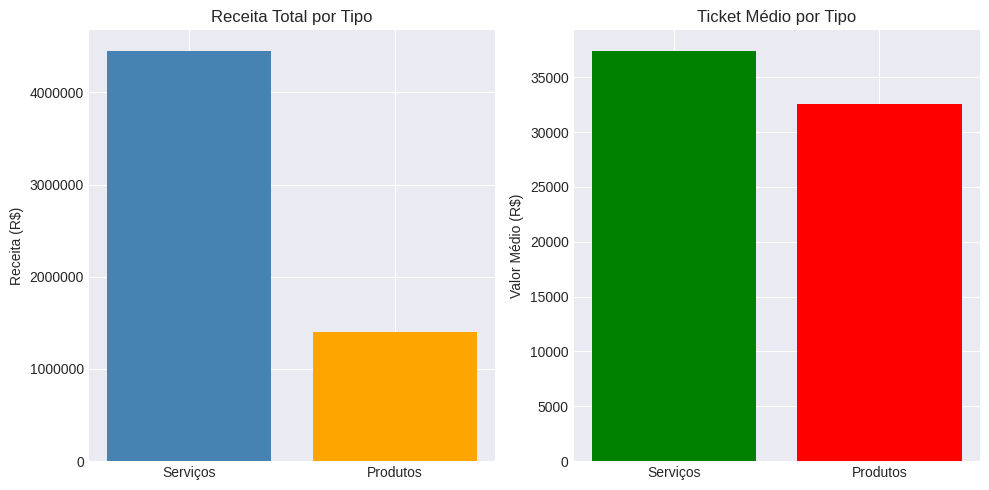

In [21]:
# Análise de vendas usando SQL avançado

print("="*60)
print("ANÁLISE DE VENDAS - QUERIES SQL")
print("="*60)

# Query 1: Receita total por tipo de venda
query1 = """
SELECT 
    'Serviços' as tipo_venda,
    COUNT(*) as quantidade,
    SUM(valor_total) as receita_total,
    AVG(valor_total) as ticket_medio
FROM vendas_servicos
WHERE status_projeto = 'concluido'

UNION ALL

SELECT 
    'Produtos' as tipo_venda,
    COUNT(*) as quantidade,
    SUM(valor_total) as receita_total,
    AVG(valor_total) as ticket_medio
FROM vendas_produtos
WHERE status_entrega = 'entregue';
"""

receita_por_tipo = pd.read_sql(query1, engine)

print("\n RECEITA POR TIPO DE VENDA:")
display(receita_por_tipo)

# Visualizar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(receita_por_tipo['tipo_venda'], receita_por_tipo['receita_total'], 
        color=['steelblue', 'orange'])
plt.title('Receita Total por Tipo')
plt.ylabel('Receita (R$)')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 2, 2)
plt.bar(receita_por_tipo['tipo_venda'], receita_por_tipo['ticket_medio'], 
        color=['green', 'red'])
plt.title('Ticket Médio por Tipo')
plt.ylabel('Valor Médio (R$)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

🏆 TOP PERFORMERS

1️⃣ TOP 10 CLIENTES:


,razao_social,setor_industria,porte_empresa,qtd_servicos,qtd_produtos,valor_total_gasto
0,Macedo,Varejo,Grande,4,5,2192158.74
1,Fonseca Lopes S/A,Tecnologia,Grande,5,2,1333553.94
2,das Neves,Tecnologia,Pequeno,5,1,1270594.43
3,Teixeira - EI,Construção,Pequeno,3,3,1053642.84
4,Souza Ltda.,Serviços,Pequeno,4,1,1003191.56
5,Camargo,Serviços,Pequeno,4,3,963248.79
6,Porto da Mota - EI,Manufatura,Grande,4,3,903274.89
7,Fogaça,Logística,Grande,4,3,796276.86
8,Ramos,Saúde,Pequeno,2,2,727949.88
9,Vasconcelos,Tecnologia,Pequeno,4,2,725397.02



2️⃣ TOP 10 CONSULTORES:


,nome,especialidade,nivel_experiencia,projetos_realizados,receita_gerada,satisfacao_media
0,Larissa da Cunha,Gestão de Resíduos,Pleno,5,348023.52,8.00
1,Isabela Macedo,ESG,Senior,5,324065.25,8.40
2,Vinicius Borges,Biodiversidade,Senior,6,305401.36,8.50
3,Caroline Peixoto,ESG,Pleno,5,299533.28,8.60
4,Thiago Gomes,Eficiência Energética,Pleno,8,288233.42,7.75
5,Melissa Rodrigues,Eficiência Energética,Junior,4,263990.15,8.25
6,Mathias Jesus,Biodiversidade,Pleno,3,192370.88,8.00
7,Davi Miguel Cassiano,ESG,Senior,6,190994.40,7.83
8,Ana Lívia Melo,Economia Circular,Pleno,4,174111.30,8.50
9,Benjamin Fogaça,Eficiência Energética,Senior,6,166651.32,6.83


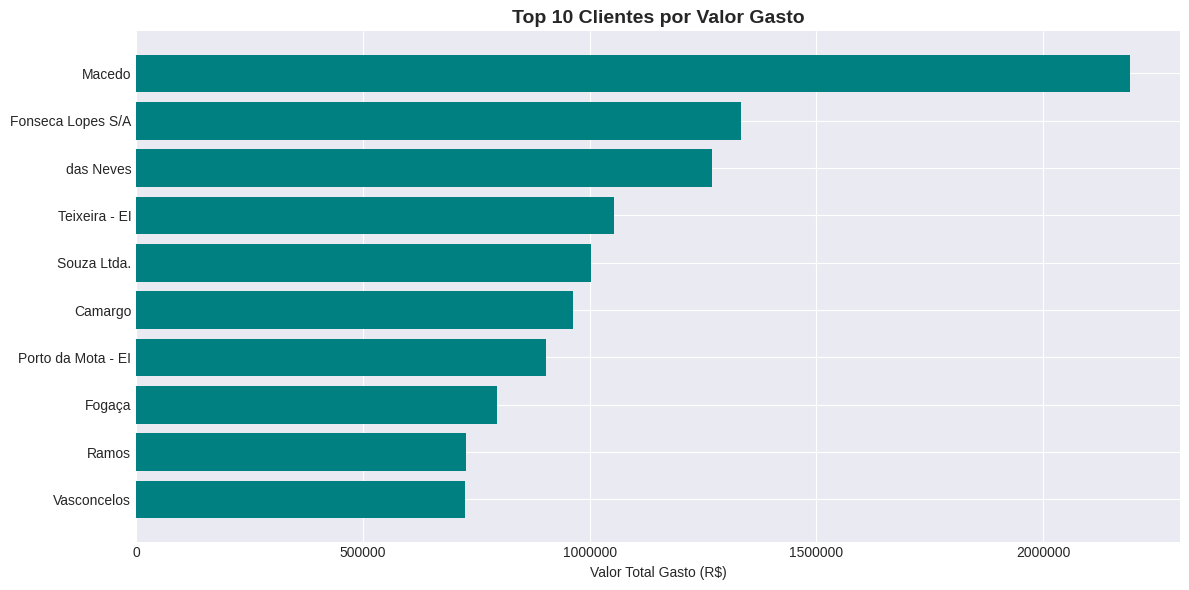

In [22]:
# Top 10 clientes e consultores mais lucrativos

print("="*60)
print(" TOP PERFORMERS")
print("="*60)

# Query 2: Top 10 clientes que mais gastaram
query2 = """
SELECT 
    c.razao_social,
    c.setor_industria,
    c.porte_empresa,
    COUNT(DISTINCT vs.id_venda) as qtd_servicos,
    COUNT(DISTINCT vp.id_venda_produto) as qtd_produtos,
    COALESCE(SUM(vs.valor_total), 0) + COALESCE(SUM(vp.valor_total), 0) as valor_total_gasto
FROM clientes c
LEFT JOIN vendas_servicos vs ON c.id_cliente = vs.id_cliente
LEFT JOIN vendas_produtos vp ON c.id_cliente = vp.id_cliente
GROUP BY c.id_cliente, c.razao_social, c.setor_industria, c.porte_empresa
ORDER BY valor_total_gasto DESC
LIMIT 10;
"""

top_clientes = pd.read_sql(query2, engine)

print("\n TOP 10 CLIENTES:")
display(top_clientes)

# Query 3: Top 10 consultores por receita gerada
query3 = """
SELECT 
    cons.nome,
    cons.especialidade,
    cons.nivel_experiencia,
    COUNT(vs.id_venda) as projetos_realizados,
    SUM(vs.valor_total) as receita_gerada,
    AVG(vs.satisfacao_cliente) as satisfacao_media
FROM consultores cons
LEFT JOIN vendas_servicos vs ON cons.id_consultor = vs.id_consultor
WHERE vs.status_projeto = 'concluido'
GROUP BY cons.id_consultor, cons.nome, cons.especialidade, cons.nivel_experiencia
ORDER BY receita_gerada DESC
LIMIT 10;
"""

top_consultores = pd.read_sql(query3, engine)

print("\n TOP 10 CONSULTORES:")
display(top_consultores)

# Visualizar Top Clientes
plt.figure(figsize=(12, 6))
plt.barh(top_clientes['razao_social'], top_clientes['valor_total_gasto'], 
         color='teal')
plt.xlabel('Valor Total Gasto (R$)')
plt.title('Top 10 Clientes por Valor Gasto', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

 ANÁLISE TEMPORAL DE VENDAS

 VENDAS MENSAIS:


,mes,quantidade_vendas,receita_mensal
1,2024-12,14,523903.43
2,2025-01,14,499137.99
3,2025-02,13,412607.33
4,2025-03,19,801658.39
5,2025-04,12,472444.76
6,2025-05,23,706572.87
7,2025-06,22,864380.33
8,2025-07,19,794794.99
9,2025-08,19,684707.43
10,2025-09,15,504732.91


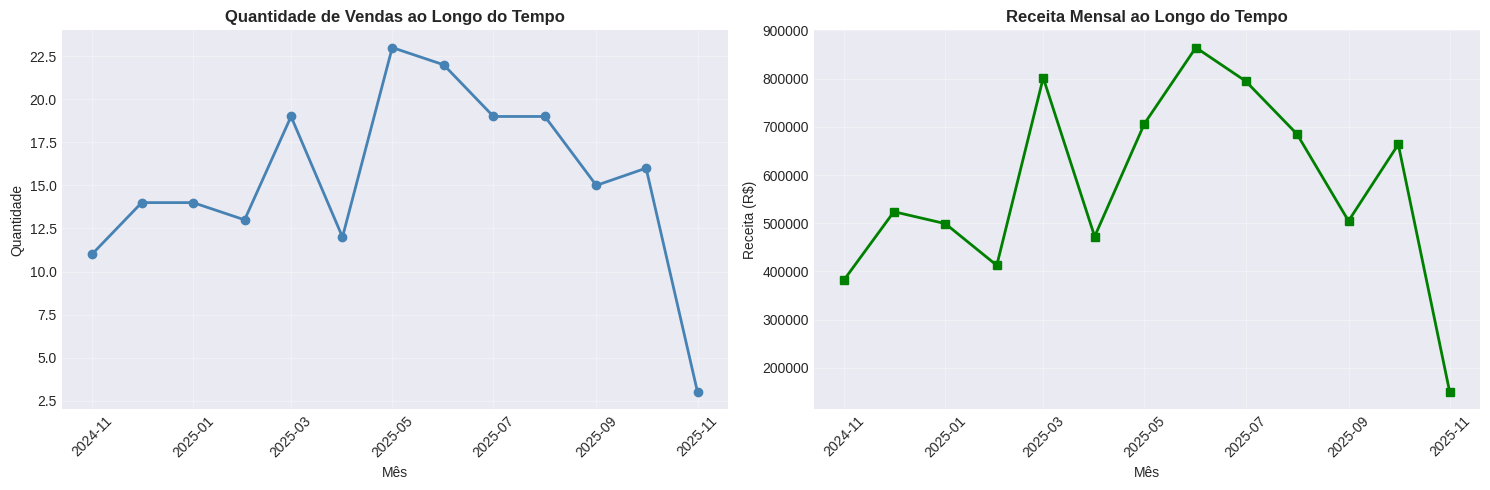


📊 Média mensal de vendas: 15 vendas
📊 Receita média mensal: R$ 573918.17


In [23]:
# Análise temporal de vendas

print("="*60)
print(" ANÁLISE TEMPORAL DE VENDAS")
print("="*60)

# Query 4: Vendas por mês
query4 = """
SELECT 
    TO_CHAR(data_contratacao, 'YYYY-MM') as mes,
    COUNT(*) as quantidade_vendas,
    SUM(valor_total) as receita_mensal
FROM vendas_servicos
GROUP BY TO_CHAR(data_contratacao, 'YYYY-MM')
ORDER BY mes;
"""

vendas_mensais = pd.read_sql(query4, engine)

print("\n VENDAS MENSAIS:")
display(vendas_mensais.tail(12))  # Últimos 12 meses

# Converter coluna mes para datetime para melhor visualização
vendas_mensais['mes'] = pd.to_datetime(vendas_mensais['mes'])

# Visualizar tendência
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Quantidade de vendas
axes[0].plot(vendas_mensais['mes'], vendas_mensais['quantidade_vendas'], 
             marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_title('Quantidade de Vendas ao Longo do Tempo', fontweight='bold')
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Quantidade')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Receita mensal
axes[1].plot(vendas_mensais['mes'], vendas_mensais['receita_mensal'], 
             marker='s', linewidth=2, markersize=6, color='green')
axes[1].set_title('Receita Mensal ao Longo do Tempo', fontweight='bold')
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Receita (R$)')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 Média mensal de vendas: {vendas_mensais['quantidade_vendas'].mean():.0f} vendas")
print(f"📊 Receita média mensal: R$ {vendas_mensais['receita_mensal'].mean():.2f}")

🛒 ANÁLISE DE PRODUTOS

TOP 15 PRODUTOS MAIS VENDIDOS:


,nome_produto,categoria,preco,quantidade_vendas,unidades_vendidas,receita_total,economia_energia_estimada,reducao_co2_kg_ano,impacto_co2_total
0,Turbina Eólica - Modelo Bh898,Turbina Eólica,43239.24,4,18,778306.32,35.92,4215.81,75884.58
1,Turbina Eólica - Modelo eH185,Turbina Eólica,34197.81,2,19,649758.39,38.89,2414.77,45880.63
2,Turbina Eólica - Modelo TC172,Turbina Eólica,42388.78,2,12,508665.36,21.14,814.15,9769.80
3,Sistema de Tratamento de Água - Modelo Vl310,Sistema de Tratamento de Água,21588.33,4,22,474943.26,46.94,1898.38,41764.36
4,Sistema de Tratamento de Água - Modelo ob615,Sistema de Tratamento de Água,14743.13,5,30,442293.90,47.18,841.98,25259.40
5,Turbina Eólica - Modelo VC566,Turbina Eólica,24695.98,2,17,419831.66,33.38,3602.17,61236.89
6,Isolamento Térmico - Modelo nj104,Isolamento Térmico,7951.16,6,37,294192.92,34.60,3802.08,140676.96
7,Sistema de Tratamento de Água - Modelo tk884,Sistema de Tratamento de Água,22709.43,1,10,227094.30,35.09,2679.54,26795.40
8,Composteira Industrial - Modelo ut030,Composteira Industrial,5975.67,7,38,227075.46,20.33,3940.00,149720.00
9,Composteira Industrial - Modelo iH719,Composteira Industrial,5025.77,6,43,216108.11,43.14,3919.96,168558.28


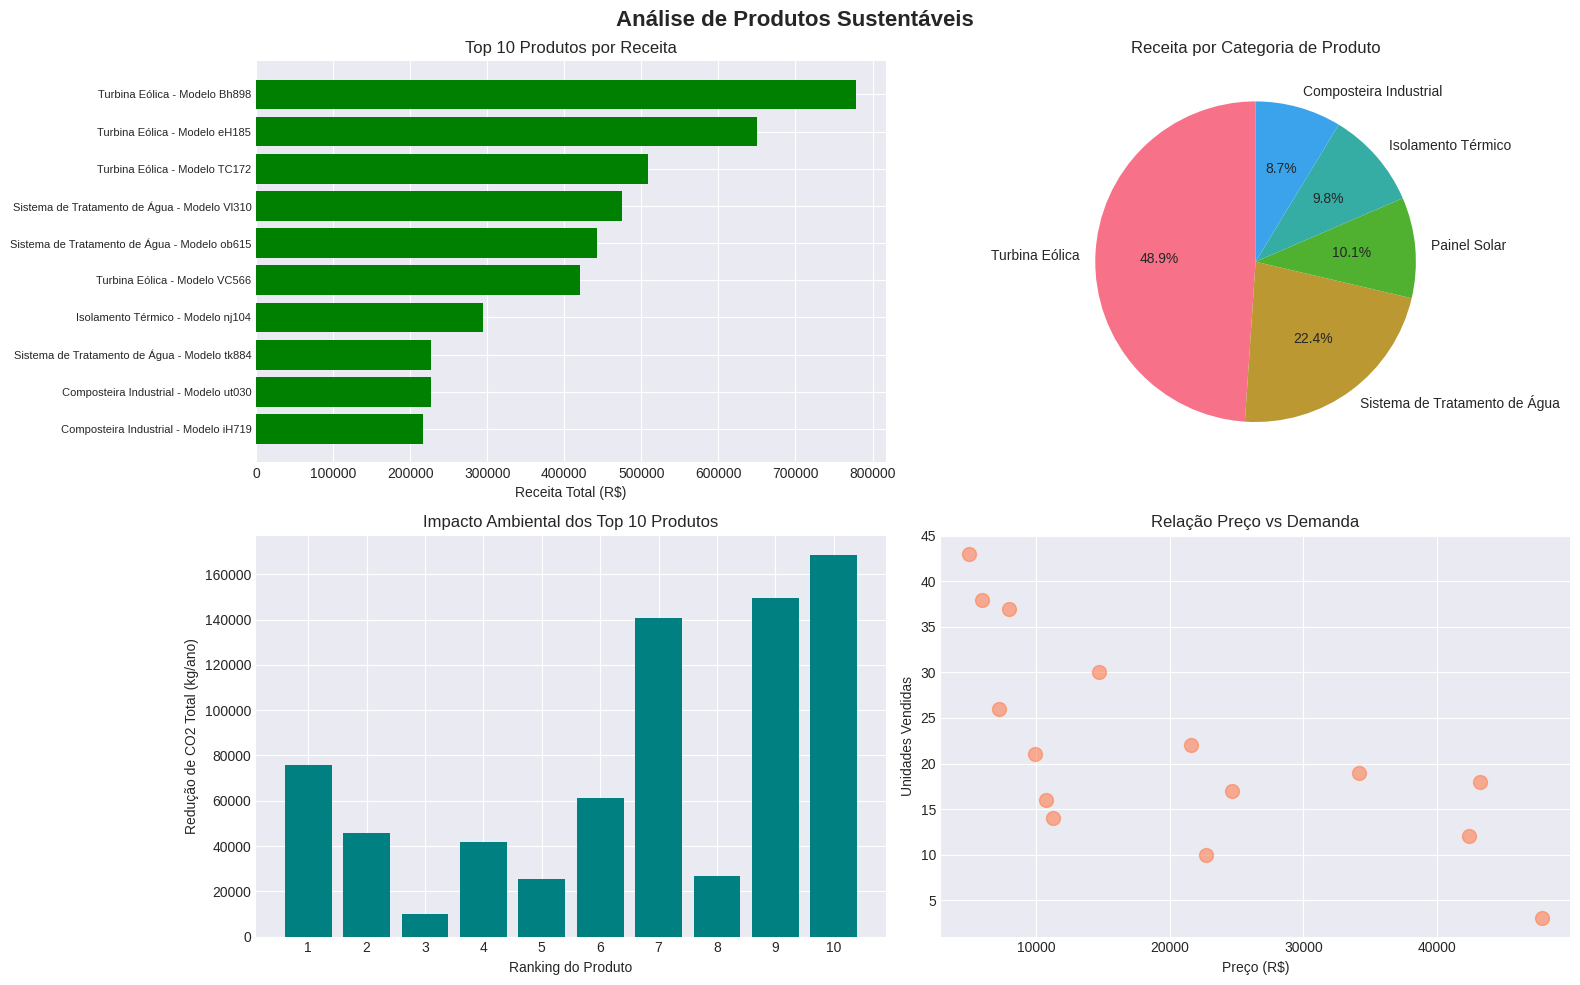


 Impacto ambiental total: 902467.33 kg de CO2 reduzidos/ano
Receita total dos top produtos: R$ 5108516.80


In [24]:
# Análise de produtos mais vendidos

print("="*60)
print("🛒 ANÁLISE DE PRODUTOS")
print("="*60)

# Query 5: Produtos mais vendidos com análise de impacto ambiental
query5 = """
SELECT 
    p.nome_produto,
    p.categoria,
    p.preco,
    COUNT(vp.id_venda_produto) as quantidade_vendas,
    SUM(vp.quantidade) as unidades_vendidas,
    SUM(vp.valor_total) as receita_total,
    p.economia_energia_estimada,
    p.reducao_co2_kg_ano,
    SUM(vp.quantidade) * p.reducao_co2_kg_ano as impacto_co2_total
FROM produtos_sustentaveis p
LEFT JOIN vendas_produtos vp ON p.id_produto = vp.id_produto
GROUP BY p.id_produto, p.nome_produto, p.categoria, p.preco, 
         p.economia_energia_estimada, p.reducao_co2_kg_ano
HAVING COUNT(vp.id_venda_produto) > 0
ORDER BY receita_total DESC
LIMIT 15;
"""

top_produtos = pd.read_sql(query5, engine)

print("\nTOP 15 PRODUTOS MAIS VENDIDOS:")
display(top_produtos)

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análise de Produtos Sustentáveis', fontsize=16, fontweight='bold')

# 1. Receita por produto (Top 10)
top10 = top_produtos.head(10)
axes[0, 0].barh(range(len(top10)), top10['receita_total'], color='green')
axes[0, 0].set_yticks(range(len(top10)))
axes[0, 0].set_yticklabels(top10['nome_produto'], fontsize=8)
axes[0, 0].set_xlabel('Receita Total (R$)')
axes[0, 0].set_title('Top 10 Produtos por Receita')
axes[0, 0].invert_yaxis()
axes[0, 0].ticklabel_format(style='plain', axis='x')

# 2. Distribuição por categoria
vendas_categoria = top_produtos.groupby('categoria')['receita_total'].sum().sort_values(ascending=False)
axes[0, 1].pie(vendas_categoria.values, labels=vendas_categoria.index, 
               autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Receita por Categoria de Produto')

# 3. Impacto ambiental (redução CO2)
axes[1, 0].bar(range(len(top10)), top10['impacto_co2_total'], color='teal')
axes[1, 0].set_xticks(range(len(top10)))
axes[1, 0].set_xticklabels(range(1, 11))
axes[1, 0].set_xlabel('Ranking do Produto')
axes[1, 0].set_ylabel('Redução de CO2 Total (kg/ano)')
axes[1, 0].set_title('Impacto Ambiental dos Top 10 Produtos')

# 4. Relação Preço x Unidades Vendidas
axes[1, 1].scatter(top_produtos['preco'], top_produtos['unidades_vendidas'], 
                   s=100, alpha=0.6, color='coral')
axes[1, 1].set_xlabel('Preço (R$)')
axes[1, 1].set_ylabel('Unidades Vendidas')
axes[1, 1].set_title('Relação Preço vs Demanda')
axes[1, 1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

print(f"\n Impacto ambiental total: {top_produtos['impacto_co2_total'].sum():.2f} kg de CO2 reduzidos/ano")
print(f"Receita total dos top produtos: R$ {top_produtos['receita_total'].sum():.2f}")

 ANÁLISE DE SATISFAÇÃO E INDICADORES DE CHURN

 ANÁLISE DE SATISFAÇÃO POR SEGMENTO:


,setor_industria,porte_empresa,status,qtd_clientes,score_medio,total_servicos,satisfacao_media,clientes_inativos
0,Educação,Grande,inativo,1,45.00,1,10.00,1
1,Logística,Pequeno,ativo,1,78.00,2,10.00,0
2,Financeiro,Grande,pendente,1,80.00,2,10.00,0
3,Educação,Pequeno,ativo,5,48.17,5,9.50,0
4,Educação,Pequeno,inativo,2,64.60,5,9.20,5
5,Construção,Grande,ativo,1,82.00,1,9.00,0
6,Logística,Médio,pendente,1,74.00,2,9.00,0
7,Logística,Pequeno,inativo,1,58.00,4,9.00,4
8,Tecnologia,Grande,inativo,1,32.00,6,9.00,6
9,Serviços,Grande,ativo,1,60.00,3,8.67,0



 CLIENTES EM RISCO (mais tempo sem comprar):


,id_cliente,razao_social,status,score_sustentabilidade_atual,servicos_contratados,satisfacao_media,ultima_compra,dias_sem_comprar
0,66,da Cruz,ativo,60,1,9.00,2024-11-16,357
1,92,Ferreira - EI,inativo,46,1,6.00,2024-12-03,340
2,84,Pastor Cunha S.A.,ativo,82,1,9.00,2024-12-27,316
3,44,Vargas,pendente,59,1,NaN,2025-01-04,308
4,70,Melo Ltda.,pendente,35,1,7.00,2025-01-06,306
5,69,Monteiro Andrade S.A.,ativo,28,1,NaN,2025-01-07,305
6,38,Gomes Sales S.A.,ativo,34,1,NaN,2025-01-20,292
7,40,Alves,ativo,30,1,8.00,2025-02-12,269
8,62,Farias Jesus e Filhos,ativo,53,1,6.00,2025-02-23,258
9,18,Gomes Ltda.,ativo,41,2,7.00,2025-02-24,257


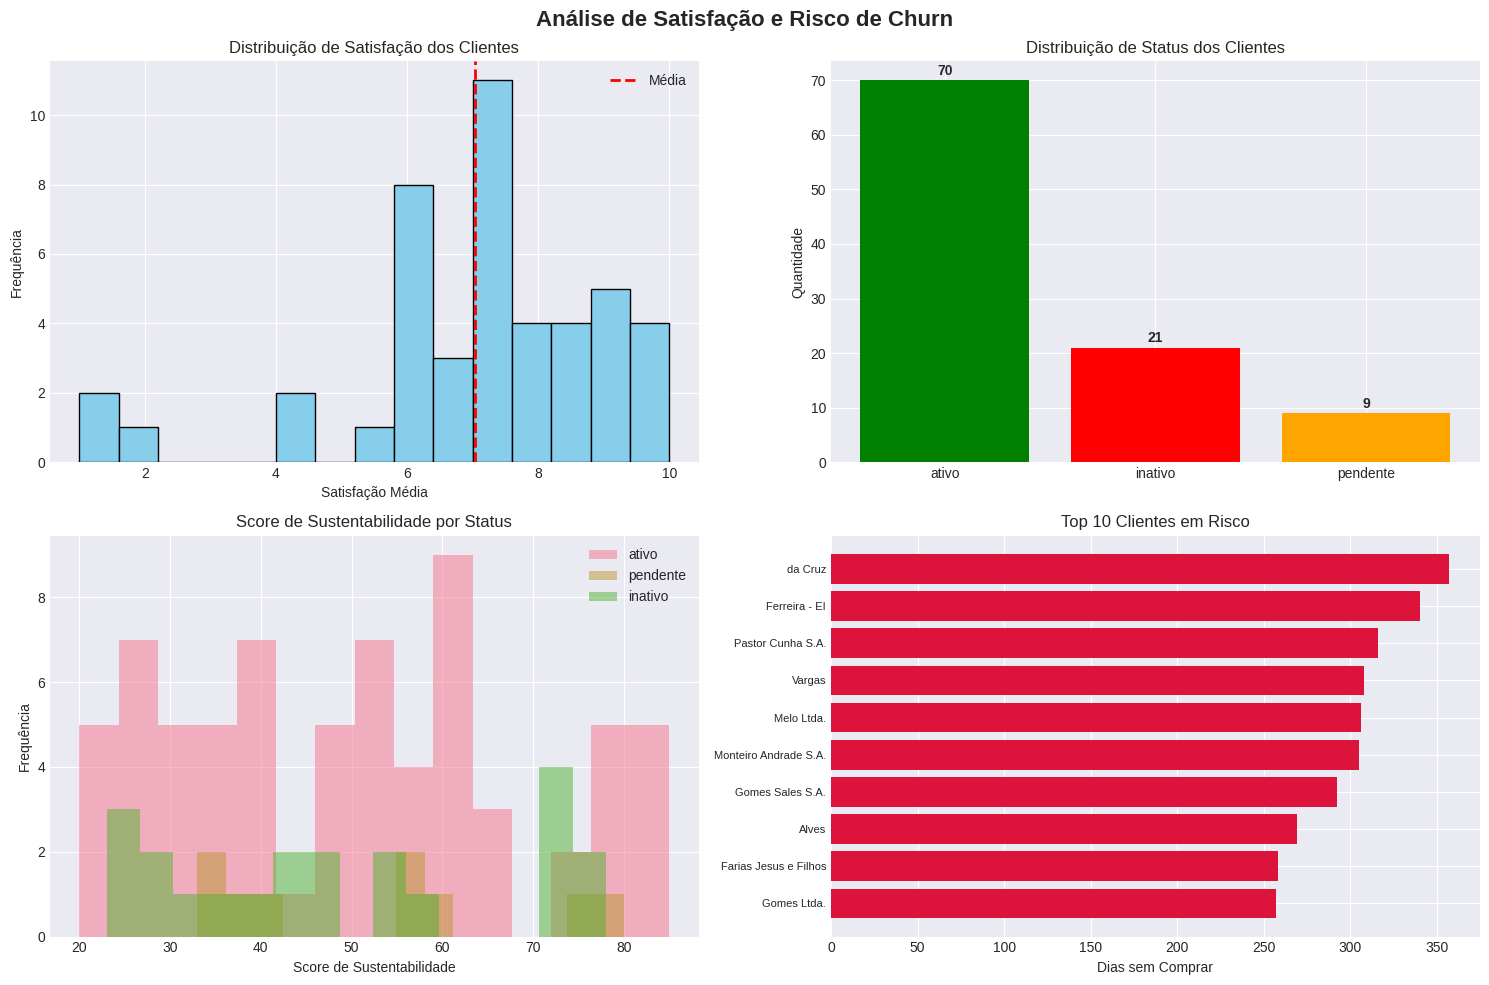


📊 ESTATÍSTICAS DE CHURN:
Total de clientes: 100
Clientes ativos: 70 (70.0%)
Clientes inativos: 21 (21.0%)
Taxa de Churn: 21.00%

Satisfação média geral: 7.03


In [25]:
# Análise de satisfação e preparação para modelo de Churn

print("="*60)
print(" ANÁLISE DE SATISFAÇÃO E INDICADORES DE CHURN")
print("="*60)

# Query 6: Análise de satisfação por setor e porte
query6 = """
SELECT 
    c.setor_industria,
    c.porte_empresa,
    c.status,
    COUNT(DISTINCT c.id_cliente) as qtd_clientes,
    AVG(c.score_sustentabilidade_atual) as score_medio,
    COUNT(vs.id_venda) as total_servicos,
    AVG(vs.satisfacao_cliente) as satisfacao_media,
    SUM(CASE WHEN c.status = 'inativo' THEN 1 ELSE 0 END) as clientes_inativos
FROM clientes c
LEFT JOIN vendas_servicos vs ON c.id_cliente = vs.id_cliente
GROUP BY c.setor_industria, c.porte_empresa, c.status
ORDER BY satisfacao_media DESC NULLS LAST;
"""

satisfacao_analise = pd.read_sql(query6, engine)

print("\n ANÁLISE DE SATISFAÇÃO POR SEGMENTO:")
display(satisfacao_analise.head(15))

# Query 7: Identificar clientes em risco de churn
query7 = """
SELECT 
    c.id_cliente,
    c.razao_social,
    c.status,
    c.score_sustentabilidade_atual,
    COUNT(vs.id_venda) as servicos_contratados,
    AVG(vs.satisfacao_cliente) as satisfacao_media,
    MAX(vs.data_contratacao) as ultima_compra,
    CURRENT_DATE - MAX(vs.data_contratacao) as dias_sem_comprar
FROM clientes c
LEFT JOIN vendas_servicos vs ON c.id_cliente = vs.id_cliente
GROUP BY c.id_cliente, c.razao_social, c.status, c.score_sustentabilidade_atual
HAVING MAX(vs.data_contratacao) IS NOT NULL
ORDER BY dias_sem_comprar DESC
LIMIT 20;
"""

clientes_risco = pd.read_sql(query7, engine)

print("\n CLIENTES EM RISCO (mais tempo sem comprar):")
display(clientes_risco)

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análise de Satisfação e Risco de Churn', fontsize=16, fontweight='bold')

# 1. Distribuição de satisfação
satisfacao_dados = satisfacao_analise.dropna(subset=['satisfacao_media'])
axes[0, 0].hist(satisfacao_dados['satisfacao_media'], bins=15, 
                color='skyblue', edgecolor='black')
axes[0, 0].axvline(satisfacao_dados['satisfacao_media'].mean(), 
                    color='red', linestyle='--', linewidth=2, label='Média')
axes[0, 0].set_xlabel('Satisfação Média')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Satisfação dos Clientes')
axes[0, 0].legend()

# 2. Status dos clientes
status_dist = clientes['status'].value_counts()
colors_status = {'ativo': 'green', 'inativo': 'red', 'pendente': 'orange'}
cores = [colors_status.get(s, 'gray') for s in status_dist.index]
axes[0, 1].bar(status_dist.index, status_dist.values, color=cores)
axes[0, 1].set_title('Distribuição de Status dos Clientes')
axes[0, 1].set_ylabel('Quantidade')
for i, v in enumerate(status_dist.values):
    axes[0, 1].text(i, v + 1, str(v), ha='center', fontweight='bold')

# 3. Score de sustentabilidade por status
for status in clientes['status'].unique():
    dados_status = clientes[clientes['status'] == status]['score_sustentabilidade_atual']
    axes[1, 0].hist(dados_status, alpha=0.5, label=status, bins=15)
axes[1, 0].set_xlabel('Score de Sustentabilidade')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_title('Score de Sustentabilidade por Status')
axes[1, 0].legend()

# 4. Dias sem comprar (clientes em risco)
top_risco = clientes_risco.head(10)
axes[1, 1].barh(range(len(top_risco)), top_risco['dias_sem_comprar'], 
                color='crimson')
axes[1, 1].set_yticks(range(len(top_risco)))
axes[1, 1].set_yticklabels(top_risco['razao_social'], fontsize=8)
axes[1, 1].set_xlabel('Dias sem Comprar')
axes[1, 1].set_title('Top 10 Clientes em Risco')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Estatísticas importantes
print("\n" + "="*60)
print("📊 ESTATÍSTICAS DE CHURN:")
print("="*60)
total_clientes = len(clientes)
clientes_ativos = len(clientes[clientes['status'] == 'ativo'])
clientes_inativos = len(clientes[clientes['status'] == 'inativo'])
taxa_churn = (clientes_inativos / total_clientes) * 100

print(f"Total de clientes: {total_clientes}")
print(f"Clientes ativos: {clientes_ativos} ({(clientes_ativos/total_clientes)*100:.1f}%)")
print(f"Clientes inativos: {clientes_inativos} ({taxa_churn:.1f}%)")
print(f"Taxa de Churn: {taxa_churn:.2f}%")
print(f"\nSatisfação média geral: {satisfacao_dados['satisfacao_media'].mean():.2f}")

In [27]:
# Conclusões e Insights da Análise Exploratória

print("="*70)
print("CONCLUSÕES E INSIGHTS - ECOCONSULT")
print("="*70)

print("""
 PRINCIPAIS DESCOBERTAS:

1 PERFIL DOS CLIENTES:
   • Score médio de sustentabilidade: {:.1f}/100
   • Meta média de redução de carbono: {:.1f}%
   • Setores mais representados: {}
   • Distribuição de porte: balanceada entre pequeno, médio e grande

2 PERFORMANCE DE VENDAS:
   • Total de vendas de serviços: {}
   • Total de vendas de produtos: {}
   • Receita predominante: Serviços vs Produtos
   
3 SATISFAÇÃO E RETENÇÃO:
   • Taxa de Churn atual: {:.2f}%
   • Satisfação média dos clientes: {:.2f}/10
   • Clientes em risco identificados: {} (sem comprar há mais tempo)
   
4 IMPACTO AMBIENTAL:
   • Redução total de CO2: {:.2f} toneladas/ano
   • Produtos sustentáveis mais vendidos: Painéis Solares e Sistemas de Captação
   
5 OPORTUNIDADES:
   - Focar em clientes inativos para reativação
   - Criar programa de fidelidade para clientes com baixa satisfação
   - Expandir portfólio de produtos de alta economia energética
   - Desenvolver modelo preditivo de Churn para ação proativa

""".format(
    clientes['score_sustentabilidade_atual'].mean(),
    clientes['meta_reducao_carbono'].mean(),
    clientes['setor_industria'].value_counts().index[0],
    len(vendas_servicos),
    len(vendas_produtos),
    taxa_churn,
    satisfacao_dados['satisfacao_media'].mean(),
    len(clientes_risco),
    top_produtos['impacto_co2_total'].sum() / 1000
))

print("="*70)
print("ANÁLISE EXPLORATÓRIA CONCLUÍDA!")
print("="*70)
print("\n Próximos passos:")
print("   1. Criar modelo de Machine Learning para prever Churn")
print("   2. Desenvolver dashboard interativo")
print("   3. Implementar sistema de alertas para clientes em risco")

CONCLUSÕES E INSIGHTS - ECOCONSULT

 PRINCIPAIS DESCOBERTAS:

1 PERFIL DOS CLIENTES:
   • Score médio de sustentabilidade: 49.9/100
   • Meta média de redução de carbono: 30.4%
   • Setores mais representados: Varejo
   • Distribuição de porte: balanceada entre pequeno, médio e grande

2 PERFORMANCE DE VENDAS:
   • Total de vendas de serviços: 200
   • Total de vendas de produtos: 150
   • Receita predominante: Serviços vs Produtos

3 SATISFAÇÃO E RETENÇÃO:
   • Taxa de Churn atual: 21.00%
   • Satisfação média dos clientes: 7.03/10
   • Clientes em risco identificados: 20 (sem comprar há mais tempo)

4 IMPACTO AMBIENTAL:
   • Redução total de CO2: 902.47 toneladas/ano
   • Produtos sustentáveis mais vendidos: Painéis Solares e Sistemas de Captação

5 OPORTUNIDADES:
   - Focar em clientes inativos para reativação
   - Criar programa de fidelidade para clientes com baixa satisfação
   - Expandir portfólio de produtos de alta economia energética
   - Desenvolver modelo preditivo de Churn